
### **Assignment:**

Create a deep neural network (CNN) classifier in Python using any framework to distinguish "rectangles" from "circles" (the dataset is attached). Also, create a class method that takes a cv2 image as an input and returns a prediction string as an output.


Please ensure that the assignment is submitted as a link to a working colab notebook.

### **Importing necessary library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import tensorflow as tf
import os
from tensorflow.keras import regularizers

### **Extracting data from the files**

In [ ]:
!unzip /content/ToyDataset.zip 

Archive:  /content/ToyDataset.zip
replace ToyDataset/toy_train.tar? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ToyDataset/toy_train.tar  
replace ToyDataset/toy_val.tar? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ToyDataset/toy_val.tar  


In [ ]:
!tar -xvf /content/ToyDataset/toy_train.tar

In [ ]:
!tar -xvf /content/ToyDataset/toy_val.tar

### **Reading data from files and showing it**

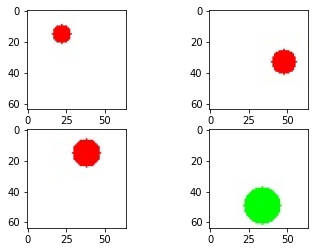

In [ ]:
in_path='/content/toy_train/circle'
for i in range(4):
  join_image=101+i
  join_image=str(join_image)+'.jpg'
  plt.subplot(2,2,i+1)
  path=os.path.join(in_path,join_image)
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  plt.imshow(img)


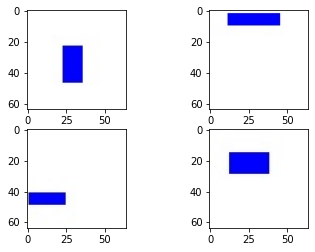

In [ ]:
in_path='/content/toy_train/rectangle'
join_image=[0,106,10,100]
for i in range(4):
  get_image=str(join_image[i])+'.jpg'
  plt.subplot(2,2,i+1)
  path=os.path.join(in_path,get_image)
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  plt.imshow(img)

### **Reading the whole data and creating a dataset and doing preprocessing**

In [ ]:
img_height=200
img_width=200
batch_size=32
epochs=5

In [ ]:
train_data_path='/content/toy_train'
train=tf.keras.utils.image_dataset_from_directory(
    train_data_path,
    seed=123,
    image_size=(img_height,img_width),
    color_mode ="grayscale",
    batch_size=batch_size
)

Found 1000 files belonging to 2 classes.


In [ ]:
val_data_path='/content/toy_val'
val=tf.keras.utils.image_dataset_from_directory(
    val_data_path,
    seed=123,
    image_size=(img_height,img_width),
    color_mode ="grayscale",
    batch_size=batch_size
)

Found 200 files belonging to 2 classes.


In [ ]:
output_class=train.class_names
print("class for prediction:",output_class)

class for prediction: ['circle', 'rectangle']


### **Seeing the size of batch**

In [ ]:
for image_batch,image_label in train:
  print(image_batch.shape)
  print(image_label.shape)
  print(image_label)
  break

(32, 200, 200, 1)
(32,)
tf.Tensor([0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1], shape=(32,), dtype=int32)


(32,)
tf.Tensor(0, shape=(), dtype=int32)


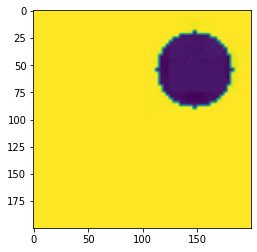

In [ ]:
for image_batch,image_label in train:
  img=np.squeeze(image_batch[0])
  print(image_label.shape)
  lab=image_label[0]
  break

plt.imshow(img)
print(lab)

### **As data is less had to perform data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  1)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

### **Creating a CNN model**

In [ ]:
num_classes = 2
d=0.40
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu',input_shape=(img_height, img_width, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

### **Training the model**

In [ ]:
history=model.fit(
    train,
    validation_data=val,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 40s 1s/step - loss: 0.9209 - accuracy: 0.5220 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 2/20
32/32 [==============================] - 37s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5100
Epoch 3/20
32/32 [==============================] - 39s 1s/step - loss: 0.6900 - accuracy: 0.5230 - val_loss: 0.6867 - val_accuracy: 0.5100
Epoch 4/20
32/32 [==============================] - 38s 1s/step - loss: 0.6547 - accuracy: 0.6740 - val_loss: 0.6982 - val_accuracy: 0.6600
Epoch 5/20
32/32 [==============================] - 38s 1s/step - loss: 0.6103 - accuracy: 0.7670 - val_loss: 0.5871 - val_accuracy: 0.8000
Epoch 6/20
32/32 [==============================] - 39s 1s/step - loss: 0.5379 - accuracy: 0.7810 - val_loss: 0.5644 - val_accuracy: 0.8250
Epoch 7/20
32/32 [==============================] - 38s 1s/step - loss: 0.4731 - accuracy: 0.7870 - val_loss: 0.5183 - val_accuracy: 0.8100
Epoch 8/20
32/32 [=============

In [ ]:
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_61 (Rescaling)    (None, 200, 200, 1)       0         
                                                                 
 sequential_51 (Sequential)  (None, 200, 200, 1)       0         
                                                                 
 conv2d_205 (Conv2D)         (None, 198, 198, 16)      160       
                                                                 
 max_pooling2d_205 (MaxPooli  (None, 99, 99, 16)       0         
 ng2D)                                                           
                                                                 
 dropout_227 (Dropout)       (None, 99, 99, 16)        0         
                                                                 
 conv2d_206 (Conv2D)         (None, 97, 97, 32)        4640      
                                                     

Text(0, 0.5, 'Accuracy')

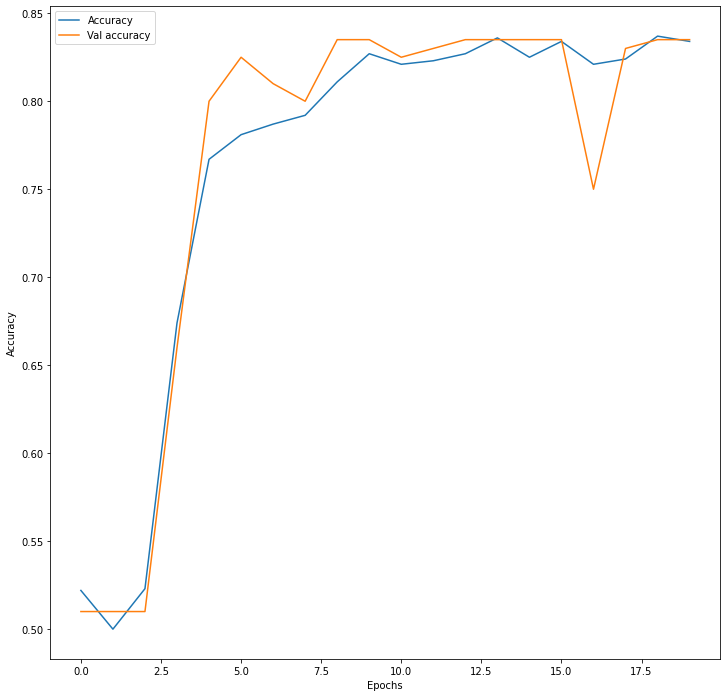

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Accuracy","Val accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

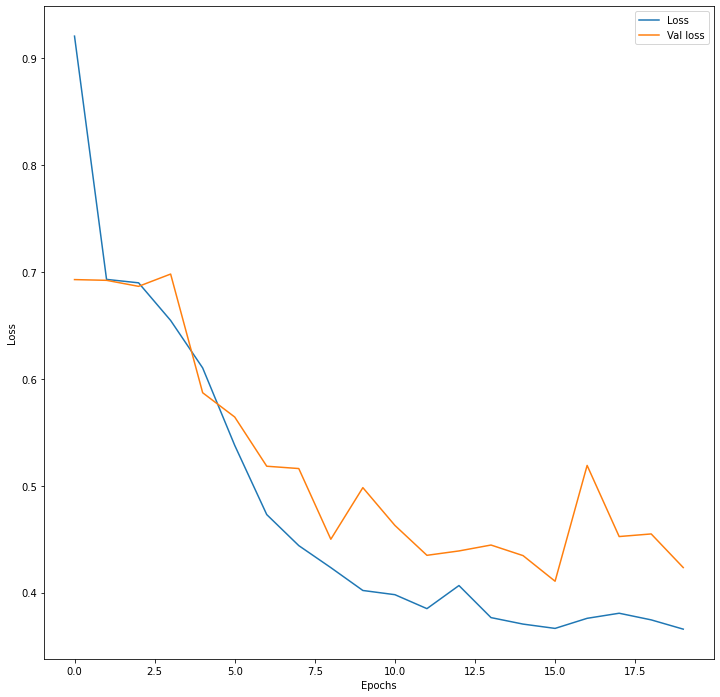

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Loss","Val loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

### **Making prediction for data**

In [ ]:
img_path='/content/toy_train/rectangle/10.jpg'
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(img_height, img_width),interpolation = cv2.INTER_NEAREST)
img=img/255
img_array =tf.expand_dims(img, 0)#[batch_size, image_width, image_height, number_of_channels]
img_array =tf.expand_dims(img_array, 3)

In [ ]:
img_array.shape

TensorShape([1, 200, 200, 1])

In [ ]:
result=model.predict(img_array)
output_class[result[0].argmax()]

'rectangle'

### **Creating class**

In [ ]:
class Identify_circle_rectangle:
  def __init__(self,img,model,output_class,img_height, img_width):
    self.img=img
    self.model=model
    self.output_class=output_class
    self.output_class=output_class
    self.img_height=img_height
    self.img_width=img_width

  def predict(self):
    self.img=cv2.resize(img,(self.img_height, self.img_width),interpolation = cv2.INTER_NEAREST)
    self.img=cv2.cvtColor(self.img,cv2.COLOR_BGR2GRAY)
    self.img=self.img/255
    img_array = tf.expand_dims(self.img, 0)
    img_array =tf.expand_dims(img_array, 3)
    result=self.model.predict(img_array)
    pred=self.output_class[result[0].argmax()]
    return pred

In [ ]:
img_path='/content/toy_train/rectangle/1.jpg'
img=cv2.imread(img_path)
pred_obj1=Identify_circle_rectangle(img,model,output_class,img_height,img_width)
print(f"It is a {pred_obj1.predict()}")

It is a rectangle


### **To increase the accuracy we must train for more epochs and should have more training data**